

## 2.1 (antithetic) Consider the class example of finding $\int_{0}^{1}\frac{dx}{1+x}$.

(a) Estimate the integral above by the MC approach using 5 uniform random variables.

(b) Use the antithetic random variable $Y = f(1 − U)$ where $1 − U$ means $(1−U_1,1−U_2,1−U_3,1−U_4,1−U_5)$. Find how the variance is reduced.

(c)Now let $\bar{U} = (1−U_1,U_2,U_3,1−U_4,U_5)$ and let $Y = f(\hat{U})$.Note that $\hat{U}$ has the same joint distribution as $U$, so Y is still a valid antithetic $RV$.

How much variance reduction do you have? Explain?


In [2]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

#### Q(a) and (b) ：Estimate the integral by MC and antithetic approach


In [241]:
N = 1000  # set the number of trials
n = 5  # set the number of uniform random variables

In [242]:
def mc_antithetic_trial(n=5):
    # generate n uniform random variables
    arr_uni = np.array(np.random.uniform(0, 1, n))
    # generate random variables for MC approach
    arr_mc = 1 / (1 + arr_uni)
    # generate antithetic random variables
    arr_antithetic = np.append(arr_mc, 1 / (1 + (1 - arr_uni)))
    return np.mean(arr_mc), np.mean(arr_antithetic)


In [243]:
# calculate the result of Q(a) and (b)
meanMC = [mc_antithetic_trial()[0] for _ in range(N)]
meanAntithetic = [mc_antithetic_trial()[1] for _ in range(N)]

In [244]:
# Calculate the variance reduced by antithetic method
varMc = np.var(meanMC)
stdMc = np.std(meanMC)
varAntithetic = np.var(meanAntithetic)
stdAntithetic = np.std(meanAntithetic)
var_reduced_ratio = (varMc - varAntithetic) / varMc

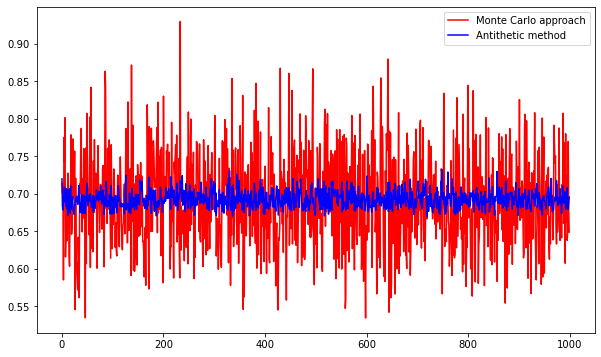

In [245]:
_, ax = plt.subplots(figsize=(10, 6))

ax.plot(meanMC, color='r', label='Monte Carlo approach')
ax.plot(meanAntithetic, color='b', label='Antithetic method')

plt.legend()
plt.show()

In [246]:
print(
    f"By MC approach, the estimation of the integral is {np.mean(meanMC)},\nBy Antithetic approach, the estimation of the integral is {np.mean(meanAntithetic)}.\nThe variance is reduced by {round(var_reduced_ratio * 100, 2)}%."
)


By MC approach, the estimation of the integral is 0.6914807968884313,
By Antithetic approach, the estimation of the integral is 0.6929279397341989.
The variance is reduced by 96.74%.


#### Q(c) Now let $\bar{U} = (1−U_1,U_2,U_3,1−U_4,U_5)$ and let $Y = f(\hat{U})$


In [247]:
def mc_barU_trial(n=5):
    # generate n uniform random variables
    arr_uni = np.array(np.random.uniform(0, 1, n))
    # generate random variables for MC approach
    arr_mc = 1 / (1 + arr_uni)
    # generate U bar random variables
    bar_uni = np.array(
        [1 - arr_uni[0], arr_uni[1], arr_uni[2], 1 - arr_uni[3], arr_uni[4]])
    arr_bar = np.append(arr_mc, 1 / (1 + bar_uni))
    return np.mean(arr_mc), np.mean(arr_bar)

In [248]:
meanMC = [mc_barU_trial()[0] for _ in range(N)]
meanBarU = [mc_barU_trial()[1] for _ in range(N)]

In [249]:
varMc = np.var(meanMC)
stdMc = np.std(meanMC)
varBarU = np.var(meanBarU)
stdBarU = np.std(meanBarU)
var_reduced_ratio = (varMc - varBarU) / varMc

print(
    f"The variance of the MC approach is: {varMc},\nThe variance of the U bar approach is: {varBarU}.\nThe variance is reduced by {round(var_reduced_ratio * 100, 2)}% by the Bar U approach"
)


The variance of the MC approach is: 0.004051602132359712,
The variance of the U bar approach is: 0.0023572955724842277.
The variance is reduced by 41.82% by the Bar U approach


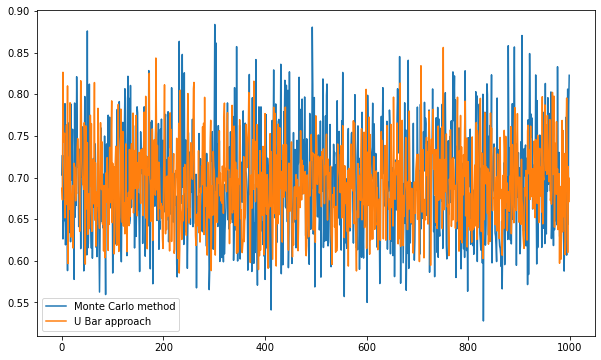

In [250]:
_, ax = plt.subplots(figsize=(10, 6))

ax.plot(meanMC, label='Monte Carlo method')
ax.plot(meanBarU, label='U Bar approach')

plt.legend()
plt.show()

### As we can see from the variance reduced,both the antethetic approach and U bar approach can reduce the variance efficiently, while the antethetic approach works better since there are more negative-correlated random varialbles.


### 2.2 (control variates)

Reproduce the class example of estimating $\int_{0}^{1}\frac{dx}{1+x}$ by the MC approach using 100 uniform random variables and after that by using a control variate with function $g(U) = 1 + U$ as suggested in class. Compare the results.


In [251]:
N = 1000  # set the number of trials
n = 100  # set the number of uniform random variables

In [252]:
def single_trial(
        n=100):  # build the single trial for MC and control variates approach
    arr_uni = np.array(np.random.uniform(
        0, 1, n))  # generate n uniform random variables array
    arr_func = 1 / (1 + arr_uni)  #  original function as m
    arr_g_func = 1 + arr_uni  # g(U)  as t
    meanMC = np.mean(arr_func)  # result of MC approach
    varMC = np.var(arr_func)  # variance of MC approach
    tau_g = np.mean(arr_g_func)  # mean of g(U), as tau
    var_g = np.var(arr_g_func)  # variance of g
    c_0 = -np.cov(arr_func, arr_g_func)[0][1] / np.var(
        arr_g_func)  # c_star for a single trial
    covMC_g = np.cov(arr_func, arr_g_func)[0][1]  # covariance of MC and g
    varControl = (varMC - covMC_g**2 /
                  var_g) / n  # The variance of the controlled estimator
    ratio = (varMC - varControl
             ) / varMC  # the ratio of variance reduced by control variates
    M_value = meanMC + c_0 * (tau_g - 1.5
                              )  # the value of M， 1.5 is the mean of g(U)

    return meanMC, M_value, ratio, varMC, varControl


# tau is mean of g func

In [255]:
print(
    f"In one experiment,The estimation by MC approach is: {single_trial()[0]},\nThe estimation by control variates is: {single_trial()[1]}.\nThe ratio of variance reduced is: {round(single_trial()[2] * 100,4)}%, where the variance of MC approach is: {single_trial()[3]},the variance of control variates is: {single_trial()[4]}"
)


In one experiment,The estimation by MC approach is: 0.703941606694812,
The estimation by control variates is: 0.6954056758722996.
The ratio of variance reduced is: 99.9861%, where the variance of MC approach is: 0.015937077905874536,the variance of control variates is: 8.319804318706117e-07


In [256]:
def Ntrails_MC_ContorlVariates(N=1000):
    MCestimate = np.mean([single_trial()[0] for _ in range(N)])
    ControlVariatesEstimate = np.mean([single_trial()[1] for _ in range(N)])
    average_ratio = np.mean([single_trial()[2] for _ in range(N)])

    return MCestimate, ControlVariatesEstimate, average_ratio


In [257]:
print(
    f"After {N} experiments:\nThe integral estimation by MC approach is: {Ntrails_MC_ContorlVariates()[0]}.\nThe integral estimation by the control variates approach is: {Ntrails_MC_ContorlVariates()[1]},\nThe average ratio of variance reduced by control variates is: {round(Ntrails_MC_ContorlVariates()[2] * 100, 4)}%"
)

After 1000 experiments:
The integral estimation by MC approach is: 0.6932473417545281.
The integral estimation by the control variates approach is: 0.6929780196344745,
The average ratio of variance reduced by control variates is: 99.9888%


### 2.3 (control variates) We want to compute the following integral by the MC approach:

$$
\begin{aligned}
\int_{0}^{1}e^{(-xcos(πx))}df = E[F(U)]
\end{aligned}
$$

where $U$ is uniform on $[0,1]$ and $\mathop{f(x)} = e^{−xcos(πx)}$. Suppose we use the control variate $Y = g(U)$ with $g(x) = e^{−x}$. Note that we can compute the mean of $Y$ explicitly.

By comparing a MC simulation with and without this control variate (using $α = 1$) find the variance reduction from the control variate.


In [71]:
n = 1000  # set the number of rvs

In [77]:
arr_uni = np.array(np.random.uniform(
    0, 1, n))  # generate n uniform random variables array

Fu_arr = np.exp(-arr_uni * np.cos(np.pi * arr_uni))  # F(U) ,(m)

gu_arr = np.exp(-arr_uni)  # g(U), （t)

tau_t = np.mean(gu_arr)  # expectation of g(U) ：

c_star = -np.cov(Fu_arr, gu_arr)[0][1] / np.var(gu_arr)  # c_star

M_value = Fu_arr + c_star * (gu_arr - tau_t)

In [78]:
integralByMC = np.mean(Fu_arr) # integral by Monte Carlo Approach
integralByControlVariates = np.mean(M_value) # integral by Control Variates Method
ratio_reduced = (np.var(Fu_arr) - np.var(M_value)) / np.var(Fu_arr) # ratio of variance reduced by Control Variates Method

In [80]:
print(
    f"The integral estimation by MC approach is: {integralByMC},\nThe integral estimation by the control variates approach is: {integralByControlVariates},\nThe ratio of variance reduced by control variates is: {round(ratio_reduced * 100, 4)}%"
)

The integral estimation by MC approach is: 1.3149494432749844,
The integral estimation by the control variates approach is: 1.3149494432749842,
The ratio of variance reduced by control variates is: 64.336%


## 3. Simulating the price of the exotic option

Read 9.8 (Simulating the price of the exotic option)Write a code.

Do 100 replications and construct a 95% confidence interval for the mean option price.


### Vanilla Call Payoff

$$\mathop{C(K,t,v) = E[(p(t)-K]^+ = E[(v \cdot e ^W - K)^+]}$$

where $p(t)$ is the price of the stock a1t time $t$, $K$ is the strike price, $p(0) = v$ the start price.

\
$ln\frac{p(t+y)}{p(t)} \sim Normal(\mu t,t\sigma^2),W = \frac{p(t)}{v} \sim Normal(\mu t,t\sigma^2)$


### up-and-in call option

additional price $b$ : barrier
additional time $s$ : time maturity where $s<t$

exceicise is possible if the stock's price at time s exceeds the barrier b,the option becomes valid of $p(s)>b$

let :

$X=ln\frac{p(s)}{v},Y = ln \frac{p(t)}{p(s)},X \sim Normal(\mu t,t\sigma^2),Y \sim Normal((t-s)μ,(t-s)σ^2)$

- $P(s) = ve^X$
- $P(t) = p(s)e^Y= ve^{X+Y}$
- The payoff is :

  - $\mathop{Payoff = \underbrace{I(ve^X > b)(ve^{X+Y}-K)^+}_{I(p(s)>b)((p(t))-K)^+}}$


- ### Algorithm 1

  1. Generate $X \sim Normal(sμ,sσ^2)$
  2. If $X > ln\frac{b}{v}$:
     - then generate $Y ～ Normal((t-s)μ,(t-s)σ^2)$,$payoff = (ve^{X+Y}-K)^+$
     - else payoff 0


In [ ]:
# Set parameters
v_0 = 100  # initial value in dollars
b_threshold = 120  # the value of b in dollars
k_strike = 110  # the value of k in dollars
t_time = 5  # the end time t of simulation
s_time = 2  # the time s that the option is alive
sigma = 0.2  # the value of volatility
mu = 0.05  # the value of drift
N = 100  # the number of simulations

In [ ]:
# Algorithm 1
# Simulate the stock price at time s and t for N times.
ln_bv = np.log(b_threshold / v_0)  # calulate the ln of b/v_0

In [ ]:
xs = [
    stats.norm(loc=s_time * mu, scale=s_time * sigma**2).rvs()
    for _ in range(N)
]

ys = [
    stats.norm(loc=(t_time - s_time) * mu, scale=(t_time - s_time) * sigma *
               2).rvs() if x > ln_bv else 0 for x in xs
]

C_ktsv = [
    np.maximum(v_0 * np.exp(x + y) - k_strike, 0) for x, y in zip(xs, ys)
]
payoff_estimated = np.mean(C_ktsv)

In [ ]:
payoff_estimated

45.580152678366765

In [ ]:
# 95% confidence interval for the mean option price
C_std = np.std(C_ktsv)
interval_95 = [
    payoff_estimated - 1.96 * C_std / np.sqrt(N),
    payoff_estimated + 1.96 * C_std / np.sqrt(N)
]
interval_95

[-10.543190032234747, 101.70349538896828]

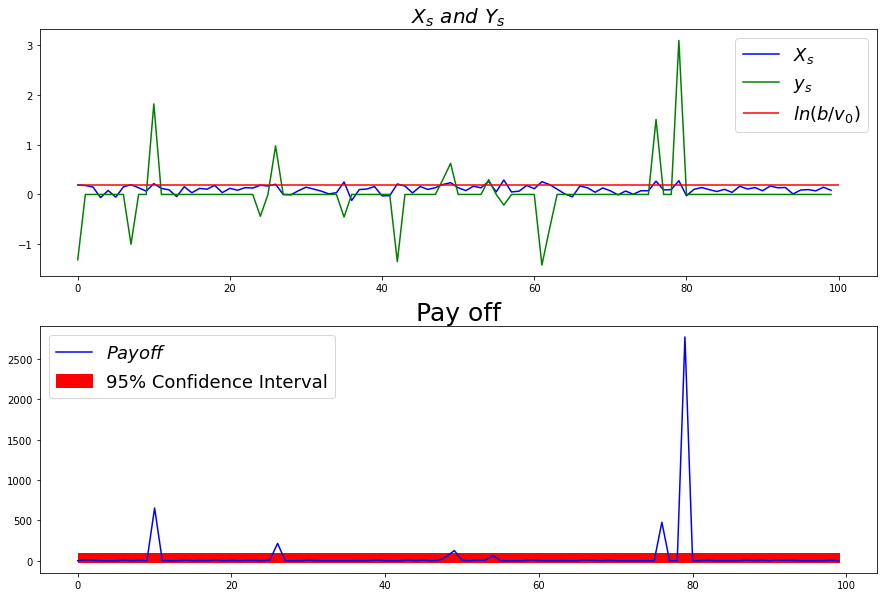

In [ ]:
_, axes = plt.subplots(2, 1, figsize=(15, 10))

axes[0].plot(xs, color='b', label='$X_s$')
axes[0].plot(ys, color='g', label='$y_s$')
axes[0].hlines(ln_bv, 0, N, color='r', label='$ln(b/v_0)$')

axes[0].set_title('$X_s\ and\ Y_s$', fontsize=20)
axes[0].legend(fontsize=18)

axes[1].plot(C_ktsv, color='b', label='$Payoff$')
axes[1].set_title('Pay off', fontsize=25)
axes[1].fill_between(range(N),
                     interval_95[0],
                     interval_95[1],
                     color='r',
                     label='95% Confidence Interval')
axes[1].legend(fontsize=18)
plt.show()

### Algorithm with variance reduction

- $R$ - Payoff
- $\mathop{E(R)= E[R|X > ln(\frac{b}{v})]\bar{Φ}[\frac{ln(\frac{b}{v})-sμ}{σ\sqrt{s}}]}$
- Steps:
  1. Generate $X> ln(\frac{b}{v})$
  2. set $\mathop{Estimator = C(K,t-s,ve^X) \bar{Φ}(\frac{ln(\frac{b}{v})- sμ}{σ√{s}})}$
- With k simulations:
  - $\mathop{Estimator = \bar{Φ}(\frac{ln(\frac{b}{v})-sμ}{σ\sqrt{s}})\frac{1}{k}∑_{i=1}^{k}C(K,t-s,ve^{X_i})}$
    - $\mathop{X = sμ + σ\sqrt{s}Z}$, where $Z>c ≡ \frac{ln(\frac{b}{v})-sμ}{σ\sqrt{s}}$
    - If c <= 0, generate Z with getting Z > c;
    - If c > 0,use rejection technique accoding to the algorithm


In [ ]:
# Algorithm wiht variance reduction
# ln_bv = np.log(b_threshold / v_0)
c_ = (np.log(b_threshold / v_0) - s_time * mu) / (sigma * np.sqrt(s_time))
phi_bar = 1 - stats.norm(0, 1).pdf(c_)
phi_bar

0.6176021710147366

In [ ]:
xs = [
    stats.norm(loc=s_time * mu, scale=s_time * sigma**2).rvs()
    for _ in range(N)
]

ys = [
    stats.norm(loc=(t_time - s_time) * mu, scale=(t_time - s_time) * sigma *
               2).rvs() if x > ln_bv else 0 for x in xs
]

C_ktsv_vr = [
    np.maximum(phi_bar * v_0 * np.exp(x + y) - k_strike, 0)
    for x, y in zip(xs, ys)
]
payoff_estimated_vr = np.mean(C_ktsv_vr)

In [ ]:
payoff_estimated_vr

10.187517214130297

In [ ]:
C_std_vr = np.std(C_ktsv_vr)
# #95% C.I. uses 1.96 z-value
interval_95_vr = [
    payoff_estimated - 1.96 * C_std_vr / np.sqrt(N),
    payoff_estimated + 1.96 * C_std_vr / np.sqrt(N)
]
interval_95_vr

[35.81135905272377, 55.34894630400976]

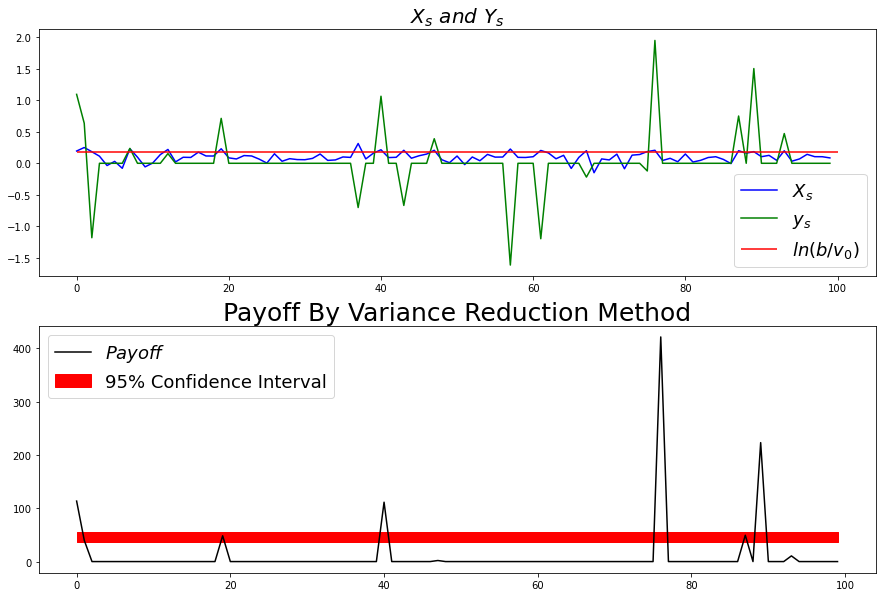

In [ ]:
_, axes = plt.subplots(2, 1, figsize=(15, 10))

axes[0].plot(xs, color='b', label='$X_s$')
axes[0].plot(ys, color='g', label='$y_s$')
axes[0].hlines(ln_bv, 0, N, color='r', label='$ln(b/v_0)$')

axes[0].set_title('$X_s\ and\ Y_s$', fontsize=20)
axes[0].legend(fontsize=18)

axes[1].plot(C_ktsv_vr, color='black', label='$Payoff$')
axes[1].fill_between(range(N),
                     interval_95_vr[0],
                     interval_95_vr[1],
                     color='r',
                     label='95% Confidence Interval')
axes[1].set_title('Payoff By Variance Reduction Method', fontsize=25)
axes[1].legend(fontsize=18)
plt.show()

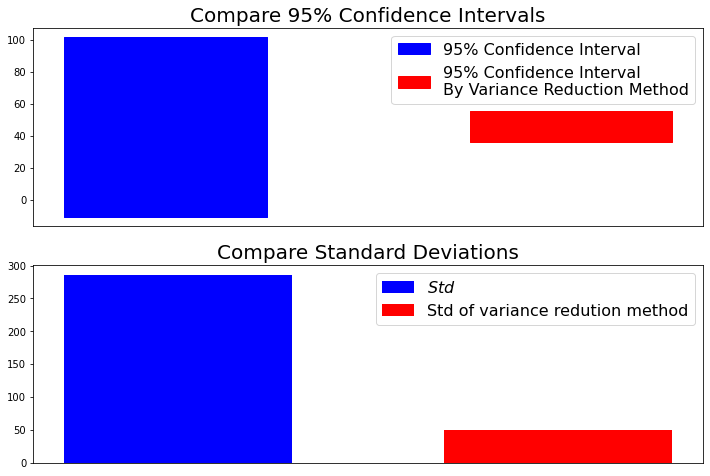

In [ ]:
_, axes = plt.subplots(2, 1, figsize=(12, 8))

axes[0].fill_between(np.linspace(0, 1),
                     interval_95[0],
                     interval_95[1],
                     color='b',
                     label='95% Confidence Interval')
axes[0].fill_between(
    np.linspace(2, 3),
    interval_95_vr[0],
    interval_95_vr[1],
    color='r',
    label='95% Confidence Interval\nBy Variance Reduction Method')
axes[0].get_xaxis().set_visible(False)
axes[0].set_title('Compare 95% Confidence Intervals', fontsize=20)
axes[0].legend(fontsize=16)
axes[1].bar(np.linspace(0, 1), C_std, width=0.2, color='b', label='$Std$')
axes[1].bar(np.linspace(2, 3),
            C_std_vr,
            width=0.2,
            color='r',
            label='Std of variance redution method')
axes[1].get_xaxis().set_visible(False)
axes[1].set_title('Compare Standard Deviations', fontsize=20)
axes[1].legend(fontsize=16)
plt.show()

## 4. MM1 Simulation

Consider a single serve queue where customers arrive according to a Poisson process with rate 3 per minute and the service times are exponentially distributed with mean 1 minute.

### a) Use simulation to estimate $θ$ the total time the first 100 customers spend in the system.


In [154]:
N = 1000  # total trial times
n = 100  # total number of arrived customers
lambda_ = 3  # lambda, customers' arrival per minue
mu = 1  # customers' service per minue
c = 1  #number of servers


In [155]:
# In the M/M/1 system, Interarrival Times for Poisson Processes are Exponential Random Variates with Mean lamda / mu.
simu_dict = {}


def time_interval_simulate(lambda_=3, mu=1, n=100):
    simu_dict['service_start'] = np.zeros(
        n)  # initialization, time  to start service for the ith customer
    simu_dict['service_end'] = np.zeros(
        n)  # initialization, time to end service for the ith customer
    simu_dict['time_customer_spend'] = np.zeros(
        n)  # initialization, time spent by the ith customer in the system
    # Generate uniform random variables for exponential rvs with mean lambda / mu for interval times
    uniform_rvs_1 = np.random.uniform(0, 1, n)
    uniform_rvs_2 = np.random.uniform(0, 1, n)

    simu_dict['customer_arrive_interval'] = -(1 / lambda_) * np.log(
        uniform_rvs_1
    )  # generate n interarrival times for ith  customer's arrival
    simu_dict['customer_served_interval'] = -(1 / mu) * np.log(
        uniform_rvs_2)  # generate n interarrival times for ith service ends.

    for i in range(n):

        simu_dict['service_start'][i] = np.maximum(
            simu_dict['customer_arrive_interval'][i],
            simu_dict['service_end'][i - 1])
        simu_dict['service_end'][i] = simu_dict['service_start'][
            i] + simu_dict['customer_served_interval'][i]
    return simu_dict['service_end'][-1]

In [156]:

theta_arr = [time_interval_simulate() for _ in range(N)]

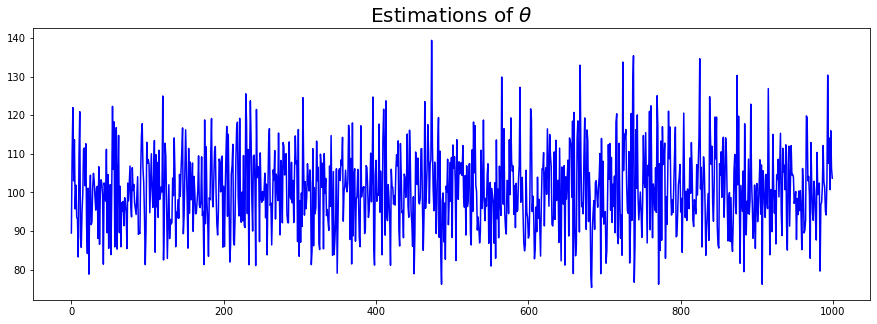

In [157]:
_, ax = plt.subplots(figsize=(15, 5))

ax.plot(theta_arr, color='b', label='Estimation of $\theta$')
ax.set_title('Estimations of $θ$', fontsize=20)

plt.show()

In [158]:
theta_hat = np.mean(theta_arr)
theta_hat

100.66986665329372

### b) Do a simulation to determine the improvement over your result in (a) with the estimator obtained by using antithetic variables.


In [204]:
# Antithetic method by generating uniform rvs,and compare it with the MC approach in problem 1.
# Note: With the application of python dictionary method,we can simulate the process faster than the application of python array.

def antithetic_MC_compare_time_interval_simulate(lambda_=3, mu=1, n=100):
    # prepare the keynames of simulation dictionary
    simu_list_MC = [
        'service_start_MC_approach',
        'service_end_MC_approach',
        'time_customer_spend_MC_approach',

    ]
    simu_list_antithetic = [
        'service_start_Antithetic_approach',
        'service_end_Antithetic_approach',
        'time_customer_spend_Antithetic_approach',
    ]
    # 'service_start' : initialization, time  to start service for the ith customer
    # 'service_end' : initialization, time to end service for the ith customer
    # 'time_customer_spend' : initialization, time spent by the ith customer in the system
    simu_dict = {}

    for i in simu_list_MC:
        simu_dict[i] = np.zeros(n)
    for j in simu_list_antithetic:
        simu_dict[j] = np.zeros(2*n)


    uniform_rvs_1 = np.random.uniform(0, 1, n)
    uniform_rvs_2 = np.random.uniform(0, 1, n)

    # MC approach
    simu_dict['customer_arrive_interval_MC_approach'] = -(
        1 / lambda_) * np.log(
            uniform_rvs_1
        )  # generate n interarrival times for ith  customer's arrival
    simu_dict['customer_served_interval_MC_approach'] = -(1 / mu) * np.log(
        uniform_rvs_2)  # generate n interarrival times for ith service ends.

    # Antithetic Variates approach
    simu_dict['customer_arrive_interval_antithetic_approach'] = np.append(
        simu_dict['customer_arrive_interval_MC_approach'],
        -(1 / lambda_) * np.log(1 - uniform_rvs_1)
    )  # generate n interarrival times for ith  customer's arrival
    simu_dict['customer_served_interval_antithetic_approach'] = np.append(
        simu_dict['customer_served_interval_MC_approach'],
        -(1 / mu) * np.log(1 - uniform_rvs_2)
    )  # generate n interarrival times for ith service ends.
    # Simulation
    for i in range(n):
        simu_dict['service_start_MC_approach'][i] = np.maximum(
            simu_dict['customer_arrive_interval_MC_approach'][i],
            simu_dict['service_end_MC_approach'][i - 1])
        simu_dict['service_end_MC_approach'][
            i] = simu_dict['service_start_MC_approach'][i] + simu_dict[
                'customer_served_interval_MC_approach'][i]
    for i in range(2*n):
        simu_dict['service_start_Antithetic_approach'][i] = np.maximum(
            simu_dict['customer_arrive_interval_antithetic_approach'][i],
            simu_dict['service_end_Antithetic_approach'][i - 1])
        simu_dict['service_end_Antithetic_approach'][
            i] = simu_dict['service_start_Antithetic_approach'][i] + simu_dict[
                'customer_served_interval_antithetic_approach'][i]


    return simu_dict['service_end_MC_approach'][-1], simu_dict[
            'service_end_Antithetic_approach'][-1]/2


In [205]:
antithetic_MC_compare_time_interval_simulate()

(102.71680779181041, 104.2164496550995)

In [206]:
theta_MC_approach = [
    antithetic_MC_compare_time_interval_simulate()[0] for i in range(N)
]
theta_antithetic_approach = [
    antithetic_MC_compare_time_interval_simulate()[1] for i in range(N)
]

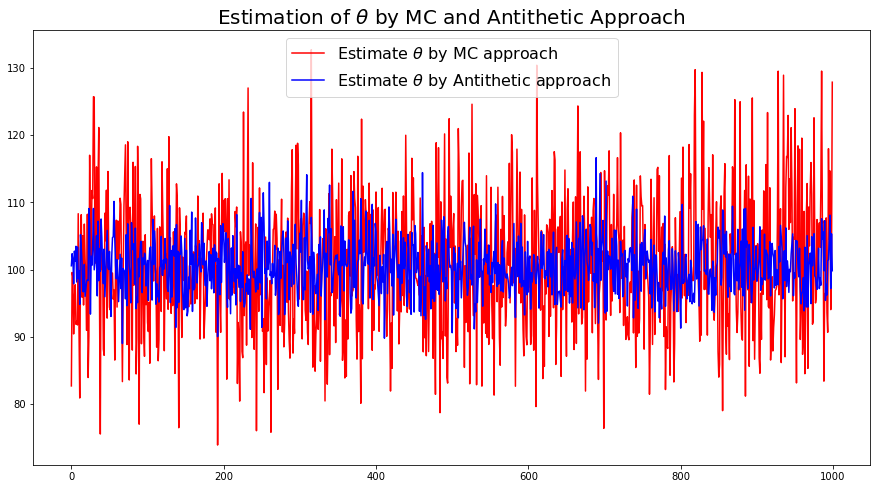

In [207]:
_, ax = plt.subplots(figsize=(15, 8))

ax.plot(theta_MC_approach, color='r', label='Estimate $θ$ by MC approach')
ax.plot(theta_antithetic_approach,
        color='b',
        label='Estimate $θ$ by Antithetic approach')
ax.legend(fontsize=16)
ax.set_title('Estimation of $θ$ by MC and Antithetic Approach', fontsize=20)
plt.show()

In [208]:
mean_MC = np.mean(theta_MC_approach)
mean_antithetic = np.mean(theta_antithetic_approach)
var_MC = np.var(theta_MC_approach)
var_antithetic = np.var(theta_antithetic_approach)

In [209]:
ratio_reduced = (var_MC - var_antithetic) / var_MC
print(
    f"With MC approach:\nThe theta value is {mean_MC}.\nWith antithetic variates approach:\nThe theta value is {mean_antithetic},the variance is reduced by {round(ratio_reduced,4)*100}%"
)

With MC approach:
The theta value is 100.78533374425187.
With antithetic variates approach:
The theta value is 100.47498921197493,the variance is reduced by 83.27%


### c) Do a simulation to determine the improvement over your result in (a) using $∑_{i=1}^{100} \mathop{T_i}$ as a control variable, where $\mathop{T_i}$ the time the th customer starts the service.·

In [258]:
# Control Variables sum start T service

def control_variables_time_interval_simulate(lambda_=3, mu=1, n=100):
    simu_dict['service_start'] = np.zeros(
        n)  # initialization, time  to start service for the ith customer
    simu_dict['service_end'] = np.zeros(
        n)  # initialization, time to end service for the ith customer
    simu_dict['time_customer_spend'] = np.zeros(
        n)  # initialization, time spent by the ith customer in the system

    simu_dict['customer_arrive_interval'] = stats.expon(scale=1 / lambda_).rvs(
        size=n)  # generate n interarrival times for ith  customer's arrival
    simu_dict['customer_served_interval'] = stats.expon(scale=1 /
                                                        mu).rvs(size=n)
    # generate n interarrival times for ith service ends.

    for i in range(n):

        simu_dict['service_start'][i] = np.maximum(
            simu_dict['customer_arrive_interval'][i],
            simu_dict['service_end'][i - 1])
        simu_dict['service_end'][i] = simu_dict['service_start'][
            i] + simu_dict['customer_served_interval'][i]

    return simu_dict['service_start'], simu_dict['service_end'][-1]

In [259]:
t_ = [np.sum(control_variables_time_interval_simulate()[0]) for i in range(N)] # time spent by of all the n customers in the system
m_ = [control_variables_time_interval_simulate()[1] for i in range(N)] # time to end service for the last customer

In [260]:
tau_t = np.mean(t_) # mean of control variates
c_star = -(np.cov(m_, t_)[0][1] / np.var(t_)) # c star
M_ = m_ + c_star * (t_ - tau_t) # calculate the target 
ratio_reduced = (np.var(m_) - np.var(M_)) / np.var(m_) # ratio of variance reduced by the control variates method

In [261]:
print(f"By control variates method:\nThe theta is estimated to be {np.mean(M_)}.\nThe variance is reduced by {round(ratio_reduced,4)*100}%")

By control variates method:
The theta is estimated to be 100.27507072549486.
The variance is reduced by 0.02%
